In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [44]:
classmates_df = pd.read_csv("CSCI_Fall_2024_survey.csv")
classmates_df

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd


In [4]:
classmates_df.columns

Index(['Timestamp', 'What is your name?', 'What are your pronouns?',
       'What state/country were you born in?',
       'How many siblings do you have?',
       'How much experience do you have programming?',
       'What class are you in? ', 'Are you working while in school?',
       'How many pets and of which kind do you have?',
       'What is your favorite type of food?', 'Where do you live?',
       'Do you take the metro?', 'What is your major?', 'How old are you?',
       'What is your favorite TV show?', 'What is your favorite video game?',
       'What is your favorite book?', 'Why are you taking this class? ',
       'Whats your favorite bash command?'],
      dtype='object')

In [18]:
classmates_df["How old are you?"] = pd.to_numeric(classmates_df["How old are you?"])

In [49]:
place_st = {"Frankfurt, Germany": "Germany","st. louis, mo" : "Missouri","St. Louis MO": "Missouri","Missouri, USA":"Missouri",
    "Georgia (the country not the state)": "Georgia","st.louis mo": "Missouri","Saint Louis, Missouri": "Missouri","Kansas, Overland Park": "Kansas",
    "United States Missouri": "Missouri","I was born in Chandigarh, India!": "India"
}

classmates_df['What state/country were you born in?'] = classmates_df['What state/country were you born in?'].map(place_st).fillna(
    classmates_df['What state/country were you born in?'])

classmates_df.head()

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Favorite Food Codes
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,1,japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls,1
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,2
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,0,italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,3
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,0,italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,3
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,0,american,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,4


In [47]:
def pet_count(pet_c):
    numbers = re.findall(r'\d+', pet_c)
    return int(numbers[0]) if numbers else 0 

classmates_df['How many pets and of which kind do you have?'] = classmates_df['How many pets and of which kind do you have?'].fillna('').astype(str)
classmates_df['How many pets and of which kind do you have?'] = classmates_df['How many pets and of which kind do you have?'].apply(pet_count)

classmates_df.head()

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,1,Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,0,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,0,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls


In [50]:
classmates_df['What is your favorite type of food?'] = (classmates_df['What is your favorite type of food?'].astype(str)#avoiding NaN
                                                        .str.lower()
                                                        .str.strip()
                                                       )

food_map = {'japanese':1,'mexican':2,'italian':3,'american':4,'chinese':5,'indian':6,'korean':7,'all of the above':8}

classmates_df['Favorite Food Codes'] = classmates_df ['What is your favorite type of food?'].map(food_map).fillna(0)

classmates_df.head()

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Favorite Food Codes
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,1,japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls,1
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,2
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,0,italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,3
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,0,italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,3
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,0,american,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,4


In [52]:
classmates_df['What is your major?'] = (classmates_df['What is your major?'].astype(str).str.lower().str.strip())

majors_st = {'computer science':'Computer Science', 'data science':'Data Science','business':'CS/Business',
             'business':'Business Economics','finance':'cs/finance','economics':'Economics'}

classmates_df["Standard Majors"] = classmates_df['What is your major?'].map(majors_st).fillna("Other")

classmates_df.head()

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,...,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?,Favorite Food Codes,Standard Majors
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,1,japanese,...,No,computer science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls,1,Computer Science
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,mexican,...,No,cs/business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls,2,Other
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,Germany,1,0-3 months,Freshman,No,0,italian,...,No,data science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit,3,Data Science
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,0,italian,...,No,business economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls,3,Other
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,Missouri,2,1-2 years,Freshman,No,0,american,...,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls,4,Computer Science


<function matplotlib.pyplot.show(close=None, block=None)>

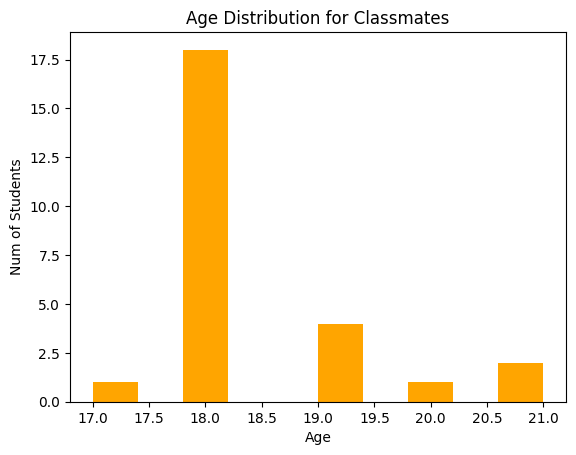

In [63]:
age_dist = classmates_df['How old are you?']

plt.figure
plt.hist(age_dist, color="orange")
plt.title('Age Distribution for Classmates')
plt.xlabel("Age")
plt.ylabel("Num of Students")

plt.show()

# This histogram shows that most students in the class are 18 years old

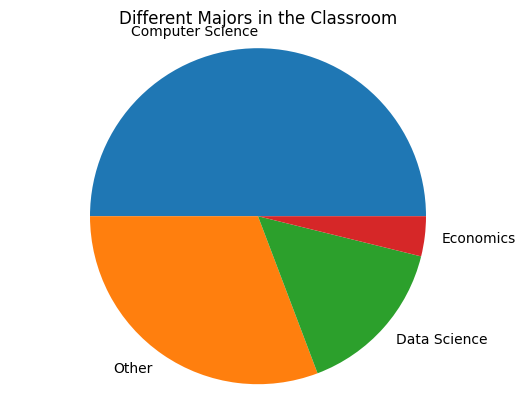

In [64]:
major_pie = classmates_df ['Standard Majors'].value_counts()

plt.figure
plt.pie (major_pie, labels = major_pie.index)
plt.title ('Different Majors in the Classroom')
plt.axis("equal")
plt.show()

# This Pie Chart shows that CS is the predominant Major among classmates in the classroom.

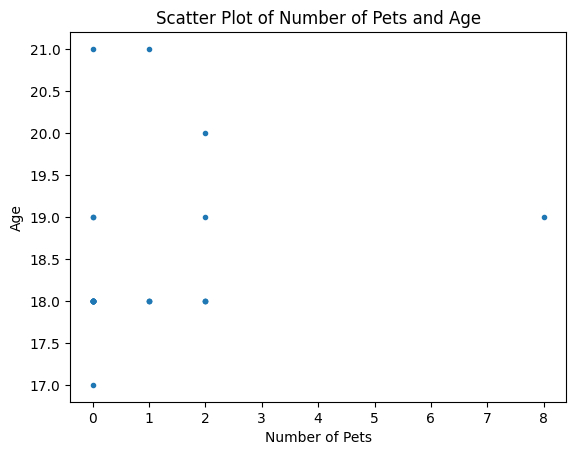

In [66]:
plt.plot(classmates_df['How many pets and of which kind do you have?'], classmates_df
         ['How old are you?'], '.')
plt.title ('Scatter Plot of Number of Pets and Age')
plt.xlabel("Number of Pets")
plt.ylabel("Age")

plt.show()

# There is a single person who is 19 y/o and has 8 pets. Almost no one has more than 2 pets.

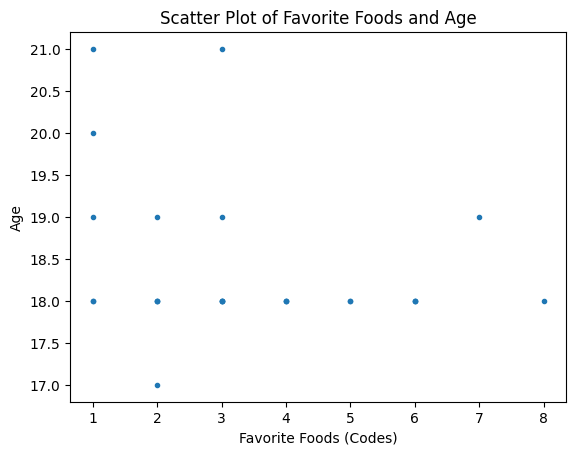

In [71]:
fav_foods = classmates_df['Favorite Food Codes']

plt.plot(classmates_df['Favorite Food Codes'], classmates_df
         ['How old are you?'], '.')
plt.title ('Scatter Plot of Favorite Foods and Age')
plt.xlabel("Favorite Foods (Codes)")
plt.ylabel("Age")

plt.show()

# People who are 18 y/o in the class have more varied favorite types of food than people of other ages.

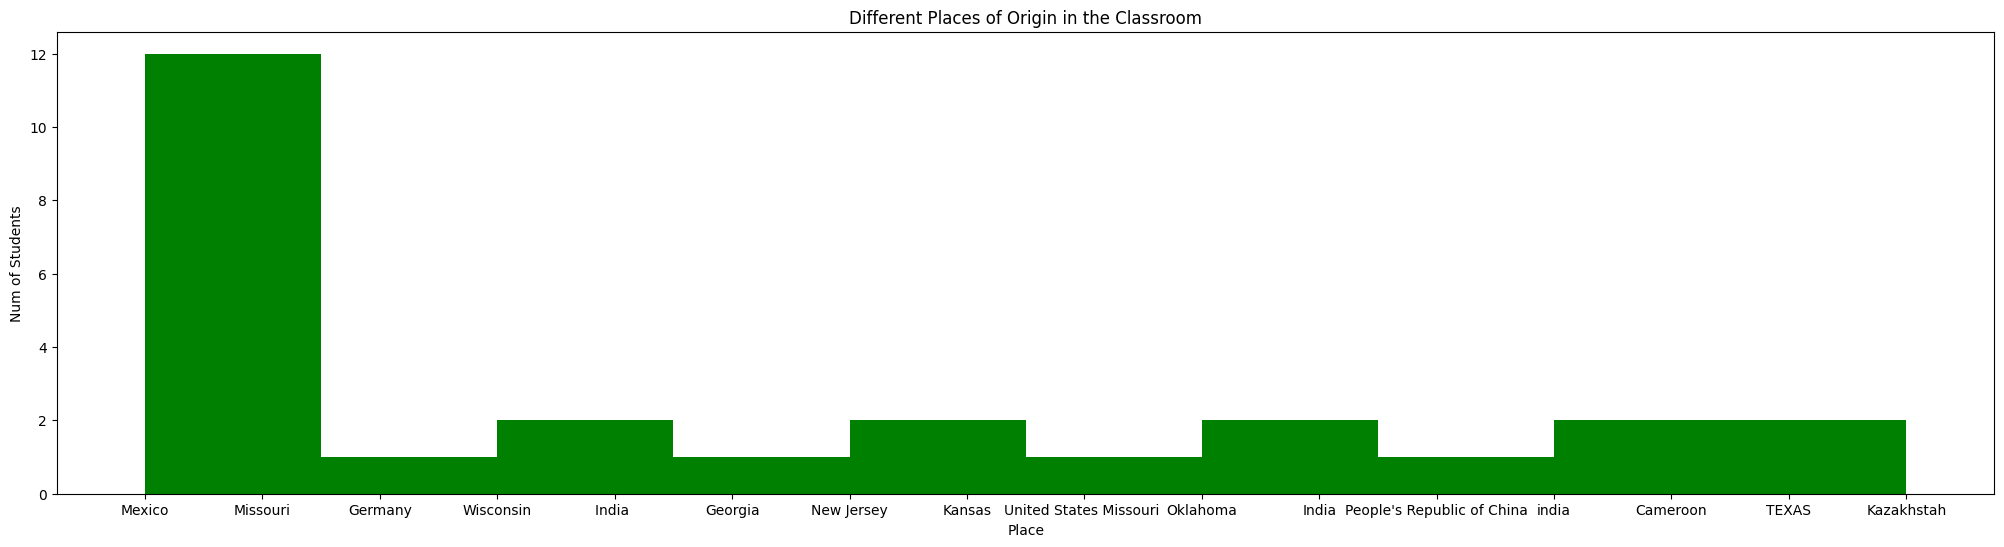

In [82]:
place_dist = classmates_df['What state/country were you born in?']

plt.figure(figsize=(25,6))
plt.hist(place_dist, color="green")
plt.title('Different Places of Origin in the Classroom')
plt.xlabel("Place")
plt.ylabel("Num of Students")

plt.show()

# Most students are from the Missouri area.